# Recurrent Neural network example

This is multilayer feed forward network with a Recurrent layer. Help observing the inner workingsof backpropagation through time.


In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Module with the neural net classes 
import DNN
import Solvers

We wil demonstrate the nonlinear representation capabilities fot the multilayer feedforward network with the XOR problem. First, let's create a small dataset with samples from positive and negative classes.  

(100, 2)


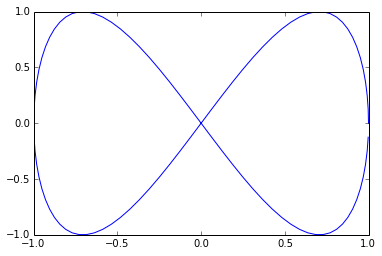

In [2]:
N = 100
T = np.ndarray((N, 1), buffer=np.array(range(N), dtype=np.float))
target = np.concatenate((np.cos(2*np.pi*T/N), np.sin(4*np.pi*T/N)), axis=1)
data = np.concatenate((np.cos(4*np.pi*T/N), np.sin(2*np.pi*T/N)), axis=1)
#data = np.random.normal(size=target.shape)

print  target.shape
plt.plot(target[:,0], target[:,1])

In [3]:
# instantiate an empty network  
rnn_net = DNN.Net()
# add layers to my_net in a bottom up fashion
rnn_net.addLayer(DNN.RNNLayer(n_in=2, n_out=2, n_hid=6, hid_activation='tanh', out_activation='tanh'))


In [4]:

# create solver object for training the feedforward network 
solver_params = {'lr_rate': 0.001,  \
                 'momentum': 0.7}  
rnn_solver = DNN.SGDSolver(solver_params)
#my_solver = DNN.NAGSolver(solver_params)
#my_solver = DNN.RMSPropSolver(solver_params)
#my_solver = DNN.AdaGradSolver(solver_params)
#my_solver = Solvers.AdaDeltaSolver(solver_params)



In [5]:
# instantiate a NetTrainer to learn parameters of my_net using the my_solver 
rnn_train_params = {'net': rnn_net, \
                'loss_func': 'mse', \
                'batch_size': 10,  \
                'max_iter': 100000, \
                'train_data': data, \
                'label_data': target, \
                'solver': rnn_solver, \
                'print_interval': 10000, \
                'shuffle_data': False}
rnn_trainer = DNN.NetTrainer(rnn_train_params)

In [6]:
rnn_net.layers[0].keepHid(True)
rnn_trainer.train()

Iteration 0, objective = 1.133419
Iteration 10000, objective = 0.011278
Iteration 20000, objective = 0.005684
Iteration 30000, objective = 0.002853
Iteration 40000, objective = 0.001692
Iteration 50000, objective = 0.001265
Iteration 60000, objective = 0.001081
Iteration 70000, objective = 0.000979
Iteration 80000, objective = 0.001014
Iteration 90000, objective = 0.001108


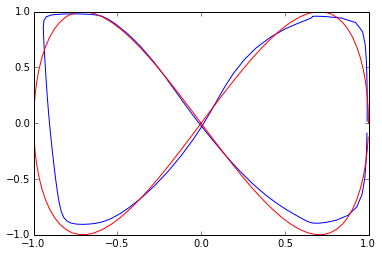

In [7]:
rnn_net.forward(data)
pred = rnn_net.Xout
## plot data point with the predicted labels
plt.plot(pred[:, 0], pred[:, 1])
plt.hold('on')
plt.plot(target[:, 0], target[:, 1], 'r')
plt.show()

# Can we do the same with a Multilayer perceptron?

In [8]:
# instantiate an empty network  
mlp_net = DNN.Net()
# add layers to my_net in a bottom up fashion
mlp_net.addLayer(DNN.Layer(n_in=2, n_out=6, activation='tanh'))
mlp_net.addLayer(DNN.Layer(n_in=6, n_out=2, activation='tanh'))
# create solver object for training the feedforward network 
mlp_solver = DNN.SGDSolver(solver_params)
#my_solver = DNN.NAGSolver(solver_params)
#my_solver = DNN.RMSPropSolver(solver_params)
#my_solver = DNN.AdaGradSolver(solver_params)
#my_solver = Solvers.AdaDeltaSolver(solver_params)
# instantiate a NetTrainer to learn parameters of my_net using the my_solver 
mlp_train_params = {'net': mlp_net, \
                'loss_func': 'mse', \
                'batch_size': 10,  \
                'max_iter': 100000, \
                'train_data': data, \
                'label_data': target, \
                'solver': rnn_solver, \
                'print_interval': 10000}
mlp_trainer = DNN.NetTrainer(mlp_train_params)


Iteration 0, objective = 0.519485
Iteration 10000, objective = 0.556265
Iteration 20000, objective = 0.530499
Iteration 30000, objective = 0.465786
Iteration 40000, objective = 0.387367
Iteration 50000, objective = 0.650756
Iteration 60000, objective = 0.529045
Iteration 70000, objective = 0.534523
Iteration 80000, objective = 0.364153
Iteration 90000, objective = 0.640501


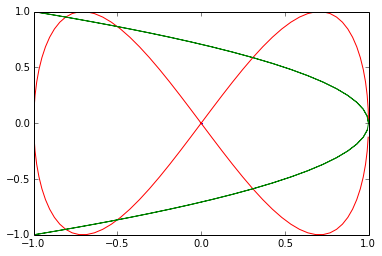

In [13]:
mlp_trainer.train()
mlp_net.forward(data)
pred = mlp_net.Xout
## plot data point with the predicted labels
plt.plot(pred[:, 0], pred[:, 1])
plt.hold('on')
plt.plot(target[:, 0], target[:, 1], 'r')
plt.plot(data[:, 0], data[:, 1], 'g')

plt.show()